<a href="https://colab.research.google.com/github/Ali-Fartout/Kaggle/blob/main/IMAGE_CLASSIFICATION_BIRD/IMAGE_CLASSIFICATION_BIRD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.90G/1.91G [00:12<00:00, 178MB/s]
100% 1.91G/1.91G [00:12<00:00, 166MB/s]


In [2]:
import zipfile
with zipfile.ZipFile("/content/100-bird-species.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [69]:
import pandas as pd
data = pd.read_csv("/content/birds.csv")

In [71]:
data["labels"].value_counts()

RUFOUS TREPE               273
HOUSE FINCH                258
OVENBIRD                   243
D-ARNAUDS BARBET           243
ASIAN GREEN BEE EATER      230
                          ... 
EURASIAN GOLDEN ORIOLE     140
PATAGONIAN SIERRA FINCH    140
NORTHERN RED BISHOP        140
SNOWY PLOVER               140
RED TAILED THRUSH          140
Name: labels, Length: 515, dtype: int64

# DataLoader and Preprocessing

In [52]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def image_loader(path):
  items = os.listdir(path)

  # Use a list comprehension to filter out only the folder names
  folders = [item for item in items if os.path.isdir(os.path.join(path, item))]

  rnd = random.randint(0,len(folders))
  label = folders[rnd]


  items = os.listdir(os.path.join(path + folders[rnd]))
  data_dir = [item for item in items if os.path.isfile(os.path.join(path + folders[rnd], item))]

  # Load the image file
  img = mpimg.imread(path + "/" +folders[rnd] + "/" + data_dir[random.randint(0,len(data_dir))])
  # Display the image using matplotlib
  plt.title(label)
  plt.imshow(img)
  plt.show()

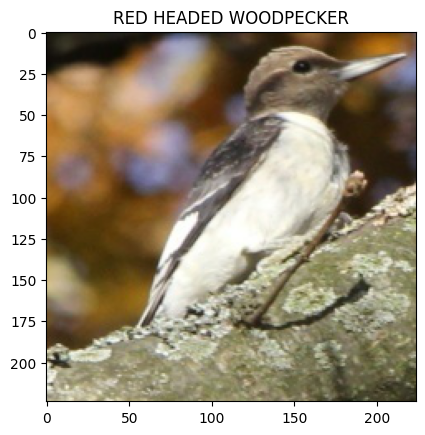

In [81]:
image_loader("/content/train/")

In [54]:
import torch
import torchvision
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.Resize(224),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])

In [61]:
train_data = datasets.ImageFolder("/content/train",transform=transform)
train_loader = torch.utils.data.DataLoader(train_data,batch_size=32)

In [75]:
data, label = train_data[163]